# Density maps

This tutorial will show how to create density maps from (2D) image data. This function uses [vedo](https://vedo.embl.es/) to calculate density maps.

In [1]:
import napari
import napari_spatial_statistics as nss

In [2]:
viewer = napari.Viewer()

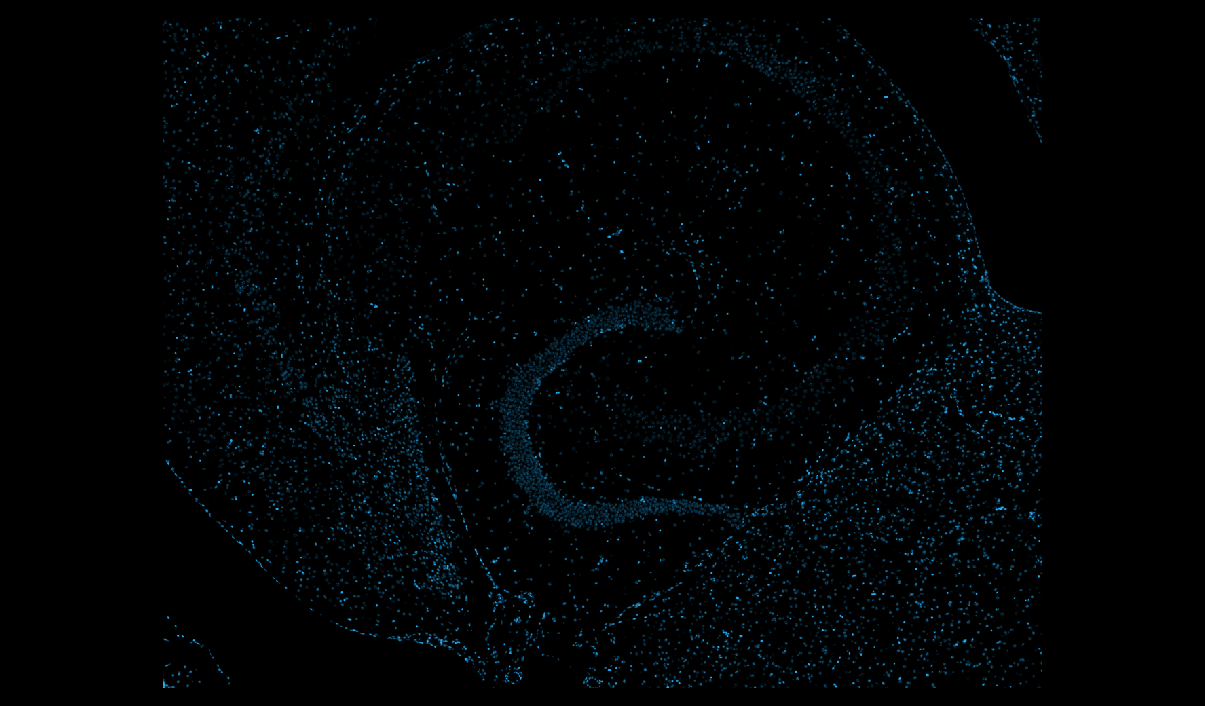

In [3]:
image = nss.brain_section()  # get some sample data from nss
viewer.add_image(image, blending='additive', colormap='bop blue')
napari.utils.nbscreenshot(viewer, canvas_only=True)

Before we can proceed, we need to detect the cells with a maxima detection. Napari-spatial-statistics provides a basic implementation:

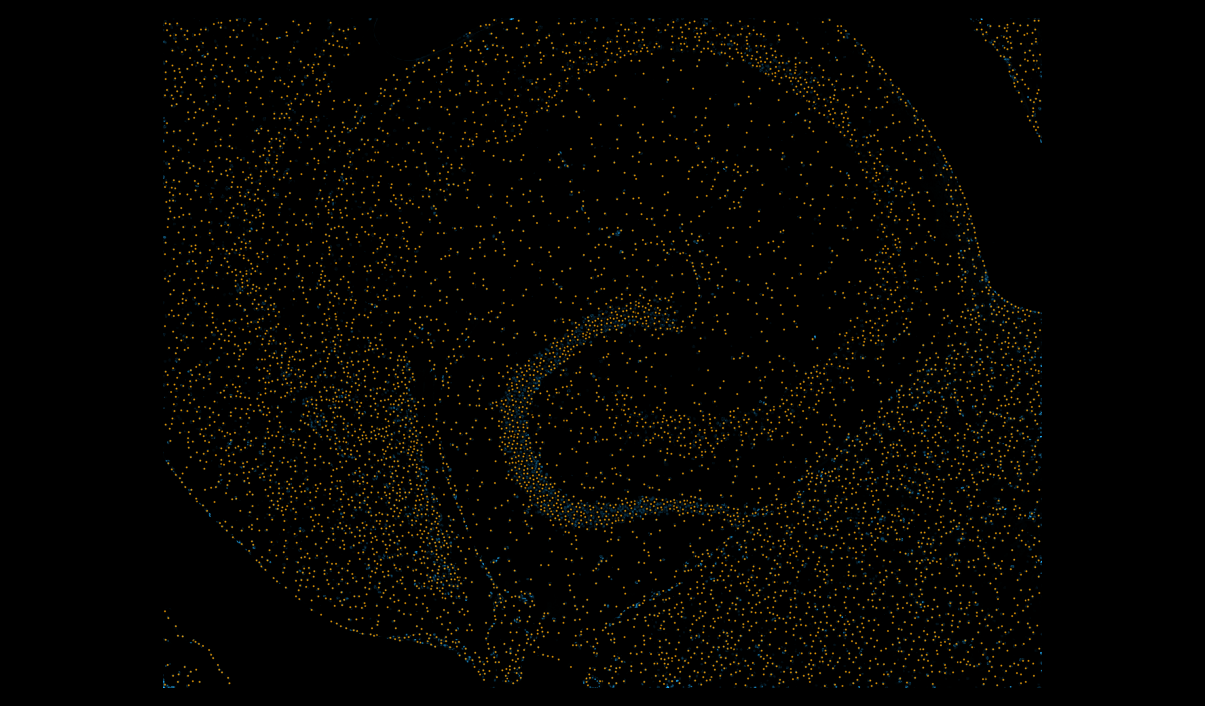

In [4]:
points = nss.detect_maxima(image, minimal_distance=3, threshold_value=30)
viewer.add_points(points, size=5, face_color='orange')
napari.utils.nbscreenshot(viewer, canvas_only=True)

Lastly, we can create a density map for the point layer. This relies on the `radius` parameter, which determines what search radius around a given pixel should be included for the density calculation. The next two cells demonstrate the influence of this parameter:

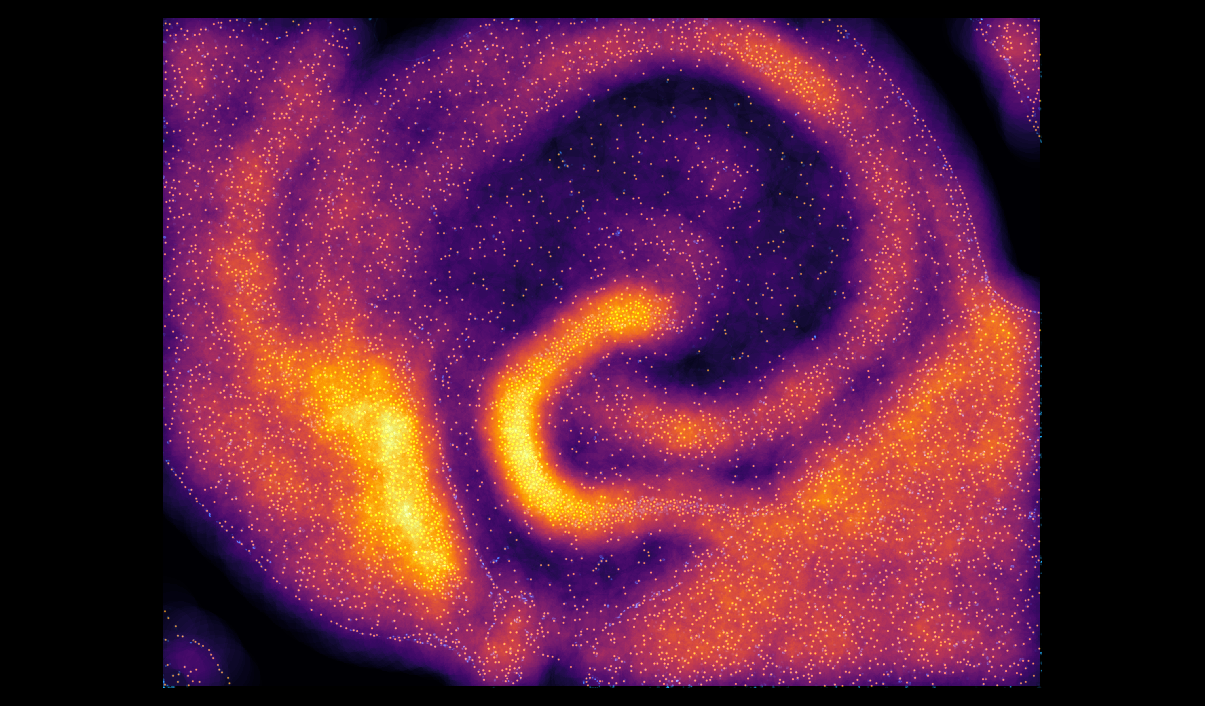

In [5]:
density_r50 = nss.density_map(points, radius=50)
density_r50_layer = viewer.add_image(density_r50, blending='additive', colormap='inferno')
napari.utils.nbscreenshot(viewer, canvas_only=True)

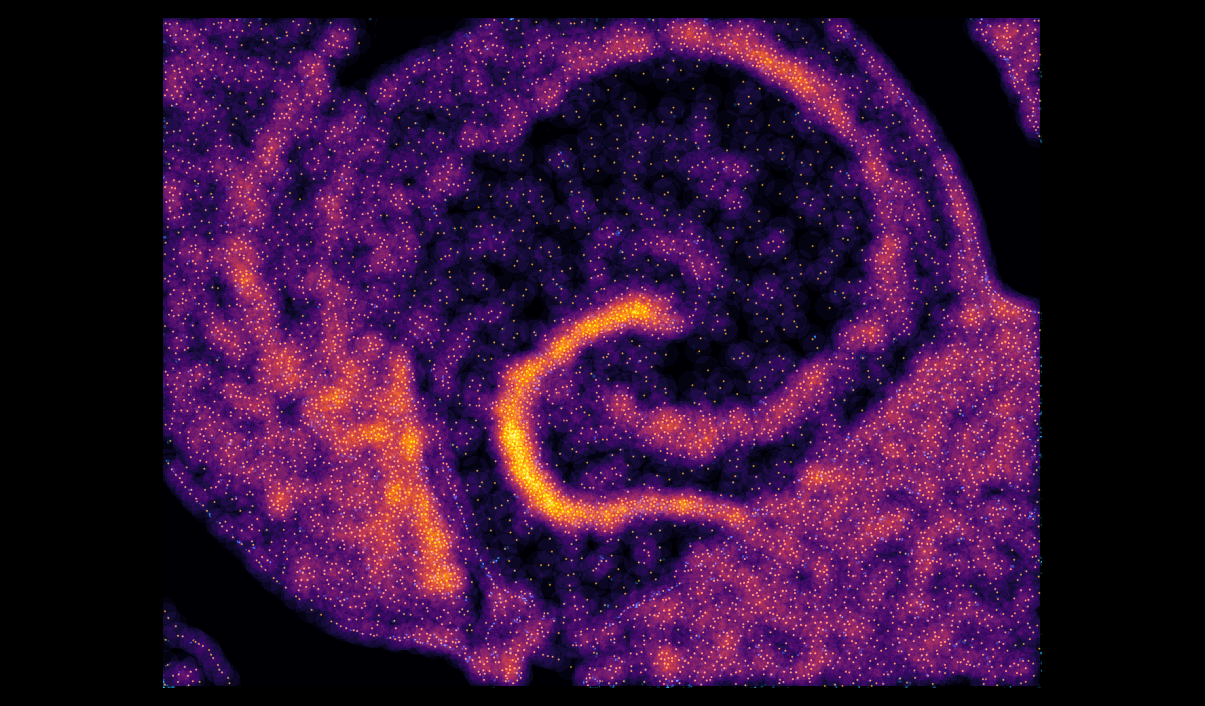

In [6]:
density_r50_layer.visible=False
density_r20 = nss.density_map(points, radius=20)
density_r20_layer = viewer.add_image(density_r20, blending='additive', colormap='inferno')
napari.utils.nbscreenshot(viewer, canvas_only=True)